### VGG16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow
!pip install keras_preprocessing
!pip install keras
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 735.2 kB/s eta 0:00:00


In [ ]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, AveragePooling2D
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Function to create DataFrame containing image paths and labels
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

# Function to extract features from images
def extract_features(images):
    features = []
    for image in images:
        img = load_img(image, grayscale=True, target_size=(48, 48))  # Resizing images to a consistent size
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

# Define directories for train and test data
TRAIN_DIR = 'drive/MyDrive/images/train'
TEST_DIR = 'drive/MyDrive/images/test'

In [ ]:
import random

# Function to create DataFrame containing limited number of image paths and labels
def create_limited_dataframe(dir, max_images_per_label):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        label_images = [os.path.join(dir, label, imagename) for imagename in os.listdir(os.path.join(dir, label))]
        random.shuffle(label_images)  # Shuffle the images for randomness
        label_images = label_images[:max_images_per_label]  # Select a limited number of images per label
        image_paths.extend(label_images)
        labels.extend([label] * len(label_images))
        print(f"{label}: {len(label_images)} images completed")
    return image_paths, labels

# Define the maximum number of images per label
MAX_IMAGES_PER_LABEL = 1000

# Create limited DataFrames for train and test data
train = pd.DataFrame()
train['image'], train['label'] = create_limited_dataframe(TRAIN_DIR, MAX_IMAGES_PER_LABEL)

test = pd.DataFrame()
test['image'], test['label'] = create_limited_dataframe(TEST_DIR, MAX_IMAGES_PER_LABEL)

neutral: 1000 images completed
sad: 1000 images completed
happy: 1000 images completed
surprise: 1000 images completed
angry: 1000 images completed
angry: 960 images completed
happy: 1000 images completed
surprise: 797 images completed
neutral: 1000 images completed
sad: 1000 images completed


In [ ]:
# # Create DataFrames for train and test data
# train = pd.DataFrame()
# train['image'], train['label'] = createdataframe(TRAIN_DIR)

neutral completed
sad completed
happy completed
surprise completed
angry completed


In [ ]:
# test = pd.DataFrame()
# test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
happy completed
surprise completed
neutral completed
sad completed


In [7]:
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

# Normalize features
x_train = train_features / 255.0
x_test = test_features / 255.0




/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [8]:
# Extract features for train and test data

# Encode labels
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)




In [9]:
# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of VGG16
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)


58889256/58889256 [==============================] - 0s 0us/step


In [15]:
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assuming x_train, y_train, x_test, y_test are already loaded and preprocessed

# Convert images to 8-bit unsigned integer
x_train_uint8 = np.array(x_train, dtype=np.uint8)
x_test_uint8 = np.array(x_test, dtype=np.uint8)

# Convert grayscale images to RGB using cv2.cvtColor()
x_train_rgb = np.array([cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) for image in x_train_uint8])
x_test_rgb = np.array([cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) for image in x_test_uint8])

# Load pre-trained VGG model without top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom top layers
flatten = Flatten()(base_model.output)
predictions = Dense(7, activation='softmax')(flatten)

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x=x_train_rgb, y=y_train, batch_size=128, epochs=30, validation_data=(x_test_rgb, y_test))

# Save the trained model
model.save('/content/drive/MyDrive/comparison_model_model/trained_model_vgg')


Epoch 1/30
40/40 [==============================] - 295s 7s/step - loss: 1.7832 - accuracy: 0.1604 - val_loss: 1.6286 - val_accuracy: 0.2483
Epoch 2/30
40/40 [==============================] - 285s 7s/step - loss: 1.6146 - accuracy: 0.2422 - val_loss: 1.6036 - val_accuracy: 0.2508
Epoch 3/30
40/40 [==============================] - 286s 7s/step - loss: 1.5980 - accuracy: 0.2426 - val_loss: 1.5925 - val_accuracy: 0.2527
Epoch 4/30
40/40 [==============================] - 282s 7s/step - loss: 1.5903 - accuracy: 0.2356 - val_loss: 1.5931 - val_accuracy: 0.2455
Epoch 5/30
40/40 [==============================] - 285s 7s/step - loss: 1.5857 - accuracy: 0.2442 - val_loss: 1.5897 - val_accuracy: 0.2571
Epoch 6/30
40/40 [==============================] - 286s 7s/step - loss: 1.5824 - accuracy: 0.2478 - val_loss: 1.5874 - val_accuracy: 0.2539
Epoch 7/30
40/40 [==============================] - 342s 9s/step - loss: 1.5804 - accuracy: 0.2538 - val_loss: 1.5866 - val_accuracy: 0.2581
Epoch 8/30
40

KeyboardInterrupt: 

model prediction is neutral
1/1 [==============================] - 0s 58ms/step
model prediction is  surprise


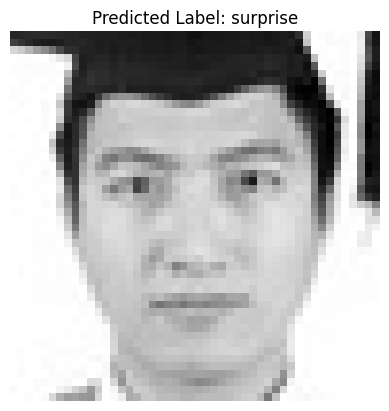

In [20]:
def load_and_preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to match the input shape of the model
    image = cv2.resize(image, (48, 48))
    # Convert grayscale image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Normalize the pixel values
    image_rgb = image_rgb / 255.0
    # Expand dimensions to add batch dimension
    image_rgb = np.expand_dims(image_rgb, axis=0)
    return image_rgb

# Example usage: Load an image, make predictions, and plot the image with predicted label
image_path = 'drive/MyDrive/images/test/neutral/34037.jpg'
print("model prediction is neutral")
img = load_and_preprocess_image(image_path)
pred = model.predict(img)
pred_label = label[np.argmax(pred)]
print("model prediction is ", pred_label)

# Plot the image
plt.imshow(cv2.imread(image_path))
plt.title('Predicted Label: ' + pred_label)
plt.axis('off')
plt.show()

model prediction is sad
1/1 [==============================] - 0s 90ms/step
model prediction is  angry


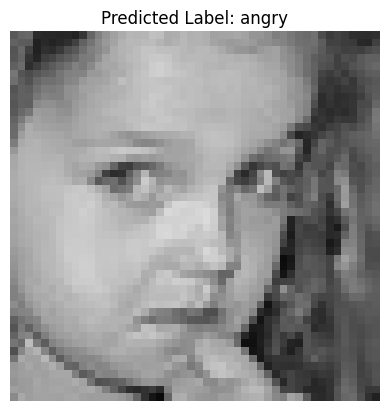

In [21]:
def load_and_preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to match the input shape of the model
    image = cv2.resize(image, (48, 48))
    # Convert grayscale image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Normalize the pixel values
    image_rgb = image_rgb / 255.0
    # Expand dimensions to add batch dimension
    image_rgb = np.expand_dims(image_rgb, axis=0)
    return image_rgb

# Example usage: Load an image, make predictions, and plot the image with predicted label
image_path = 'drive/MyDrive/images/test/sad/22977.jpg'
print("model prediction is sad")
img = load_and_preprocess_image(image_path)
pred = model.predict(img)
pred_label = label[np.argmax(pred)]
print("model prediction is ", pred_label)

# Plot the image
plt.imshow(cv2.imread(image_path))
plt.title('Predicted Label: ' + pred_label)
plt.axis('off')
plt.show()

model prediction is sad
1/1 [==============================] - 0s 231ms/step
model prediction is  surprise


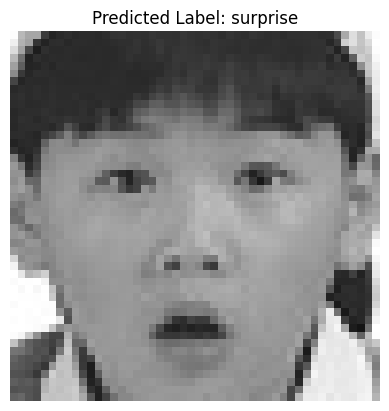

In [22]:
def load_and_preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to match the input shape of the model
    image = cv2.resize(image, (48, 48))
    # Convert grayscale image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Normalize the pixel values
    image_rgb = image_rgb / 255.0
    # Expand dimensions to add batch dimension
    image_rgb = np.expand_dims(image_rgb, axis=0)
    return image_rgb

# Example usage: Load an image, make predictions, and plot the image with predicted label
image_path = 'drive/MyDrive/images/test/surprise/14968.jpg'
print("model prediction is surprise")
img = load_and_preprocess_image(image_path)
pred = model.predict(img)
pred_label = label[np.argmax(pred)]
print("model prediction is ", pred_label)

# Plot the image
plt.imshow(cv2.imread(image_path))
plt.title('Predicted Label: ' + pred_label)
plt.axis('off')
plt.show()